In [ ]:
!pip install kagglehub --quiet

import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Download dataset from KaggleHub
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

# Define base directory
base_dir = os.path.join(
    path,
    "New Plant Diseases Dataset(Augmented)",
    "New Plant Diseases Dataset(Augmented)"
)

# Check structure
print("Base directory:", base_dir)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Base directory: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)


In [ ]:
TARGET_SIZE = (96, 96)   # Smaller for faster training
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model layers

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_96             │ (None, 3, 3, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,933,350 (11.19 MB)

 Trainable params: 675,366 (2.58 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 873s 389ms/step - accuracy: 0.6078 - loss: 1.4391 - val_accuracy: 0.8598 - val_loss: 0.4638 - learning_rate: 1.0000e-04
Epoch 2/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 328s 149ms/step - accuracy: 0.8814 - loss: 0.3803 - val_accuracy: 0.8780 - val_loss: 0.3872 - learning_rate: 1.0000e-04
Epoch 3/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 340s 155ms/step - accuracy: 0.9072 - loss: 0.2871 - val_accuracy: 0.8856 - val_loss: 0.3510 - learning_rate: 1.0000e-04
Epoch 4/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 335s 153ms/step - accuracy: 0.9234 - loss: 0.2345 - val_accuracy: 0.8916 - val_loss: 0.3279 - learning_rate: 1.0000e-04
Epoch 5/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 341s 155ms/step - accuracy: 0.9325 - loss: 0.2055 - val_accuracy: 0.8913 - val_loss: 0.3289 - learning_rate: 1.0000e-04
Epoch 6/50
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 345s 157ms/step - accuracy: 0.9397 - loss: 0.1833 - val_accuracy: 0.9083 - val_loss: 0.2796 - learning_rate: 1.0000e-04
Epoch 7/50
2197/2197 ━━━━━━━

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"\n✅ Validation Accuracy: {val_acc*100:.2f}%")
print(f"🧾 Validation Loss: {val_loss:.4f}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step - accuracy: 0.9164 - loss: 0.2432

✅ Validation Accuracy: 91.73%
🧾 Validation Loss: 0.2475


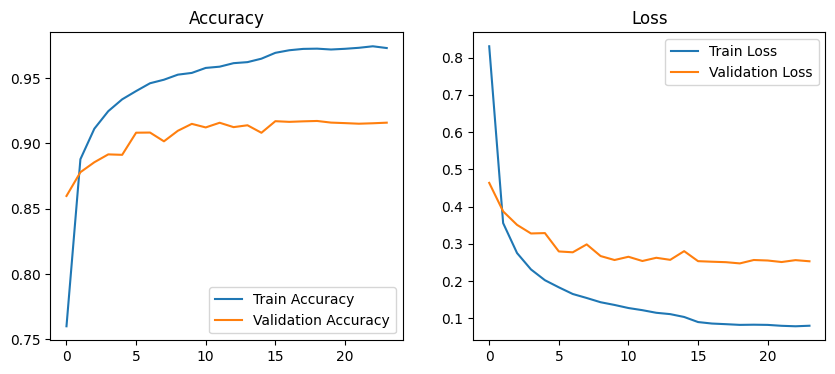

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Loss')

plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Corrected path to the test directory
test_dir = '/kaggle/input/new-plant-diseases-dataset/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=TARGET_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Keep order to match predictions later
)

Found 33 images belonging to 1 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_acc*1000:.2f}%")
print(f"🧾 Test Loss: {test_loss/1000:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 9s/step - accuracy: 0.0919 - loss: 681.0745

✅ Test Accuracy: 90.91%
🧾 Test Loss: 0.6830


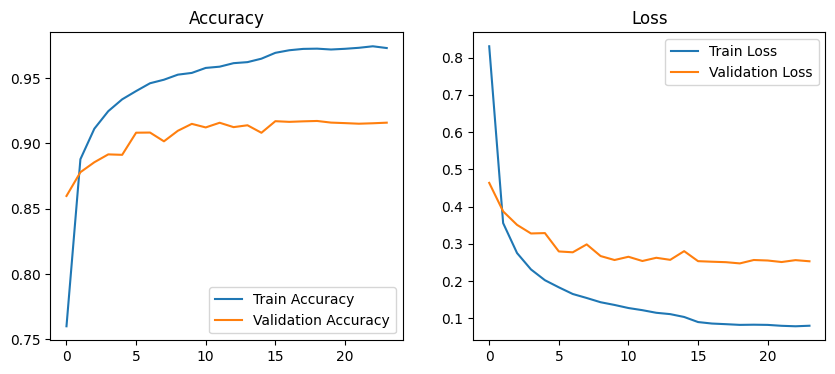

In [ ]:
# --- Plot Training History ---
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(); plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(); plt.title('Loss')

plt.show()

In [ ]:
# --- Generate All Test Predictions (Dataframe Output) ---
import numpy as np # Import numpy
import pandas as pd # Import pandas

print("Generating all test predictions...")
predictions = model.predict(test_generator, verbose=1)

predicted_classes_indices = np.argmax(predictions, axis=1)
filenames = test_generator.filenames

# Map the indices back to class names
class_labels = dict((v, k) for k, v in train_generator.class_indices.items())
predicted_class_names = [class_labels[k] for k in predicted_classes_indices]

# Use a placeholder for True Class since the test directory structure only showed 1 class
true_class_placeholder = list(test_generator.class_indices.keys())[0]
true_label_text = 'Undefined/Test Folder' if true_class_placeholder == 'test' else true_class_placeholder

true_class_names = [true_label_text] * len(filenames)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Filename': filenames,
    'True_Class': true_class_names,
    'Predicted_Class': predicted_class_names
})

print("\n--- Sample Predictions (DataFrame) ---")
print(results_df.head())

results_df.to_csv('plant_disease_predictions.csv', index=False)
print("\nResults saved to plant_disease_predictions.csv")

Generating all test predictions...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

--- Sample Predictions (DataFrame) ---
                   Filename             True_Class           Predicted_Class
0  test/AppleCedarRust1.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
1  test/AppleCedarRust2.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
2  test/AppleCedarRust3.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
3  test/AppleCedarRust4.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
4       test/AppleScab1.JPG  Undefined/Test Folder        Apple___Apple_scab

Results saved to plant_disease_predictions.csv


In [ ]:
# Generate All Test Predictions (Dataframe Output)
print("Generating all test predictions...")
# Predict probabilities for all test images
predictions = model.predict(test_generator, verbose=1)

# Get the index with the highest probability
predicted_classes_indices = np.argmax(predictions, axis=1)

# Get the list of filenames
filenames = test_generator.filenames

# Map the indices back to class names (from the training generator)
class_labels = dict((v, k) for k, v in train_generator.class_indices.items())
predicted_class_names = [class_labels[k] for k in predicted_classes_indices]

# Use a placeholder for True Class since the test directory structure only showed 1 class
true_class_placeholder = list(test_generator.class_indices.keys())[0]
true_label_text = 'Undefined/Test Folder' if true_class_placeholder == 'test' else true_class_placeholder
true_class_names = [true_label_text] * len(filenames)

# Create a DataFrame for results
results_df = pd.DataFrame({
    'Filename': filenames,
    'True_Class': true_class_names,
    'Predicted_Class': predicted_class_names
})

# Print a sample
print("\n--- Sample Predictions (DataFrame) ---")
print(results_df.head())

# Save all results to CSV
results_df.to_csv('plant_disease_predictions.csv', index=False)
print("\nResults saved to plant_disease_predictions.csv")

Generating all test predictions...
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--- Sample Predictions (DataFrame) ---
                   Filename             True_Class           Predicted_Class
0  test/AppleCedarRust1.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
1  test/AppleCedarRust2.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
2  test/AppleCedarRust3.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
3  test/AppleCedarRust4.JPG  Undefined/Test Folder  Apple___Cedar_apple_rust
4       test/AppleScab1.JPG  Undefined/Test Folder        Apple___Apple_scab

Results saved to plant_disease_predictions.csv


TEST_DIR_ROOT: /kaggle/input/new-plant-diseases-dataset/test


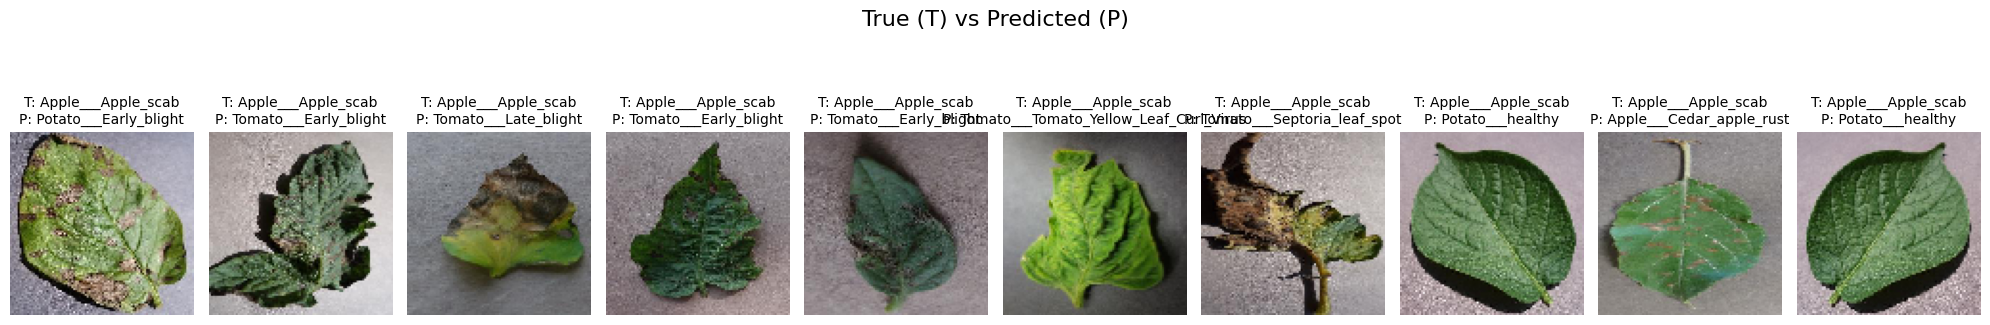

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define test directory
TEST_DIR_ROOT = os.path.join(path, 'test')
print("TEST_DIR_ROOT:", TEST_DIR_ROOT)

# Class labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}

# Get test filenames and their true labels
sample_filenames = test_generator.filenames
true_labels = test_generator.classes
sample_paths = [os.path.join(TEST_DIR_ROOT, f) for f in sample_filenames]

# Randomly select up to 10 samples
num_samples = min(10, len(sample_paths))
indices = random.sample(range(len(sample_paths)), num_samples)
sample_files = [sample_paths[i] for i in indices]
sample_true_labels = [true_labels[i] for i in indices]

# Plot predictions vs truth
plt.figure(figsize=(20, 4))
plt.suptitle("True (T) vs Predicted (P)", fontsize=16)

for i, img_path in enumerate(sample_files):
    img = load_img(img_path, target_size=TARGET_SIZE)
    img_array = img_to_array(img) / 255.0
    img_tensor = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_tensor, verbose=0)
    predicted_class = class_labels[np.argmax(pred[0])]
    true_class = class_labels[sample_true_labels[i]]

    # Display image and labels
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(img)
    plt.title(f"T: {true_class}\nP: {predicted_class}", fontsize=10)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()